In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import os
from mpl_toolkits.mplot3d import axes3d

In [22]:
class load:
    def __init__(self):
        self.file_name_dir = []
        self.total_data = []
        self.total_label = []
        
    def load_file(self,dir_location):
        print('now loading_file.... dir_name : ',dir_location)
        
        for root,dirs,files in os.walk(dir_location):
            for fname in files:
                full_name = os.path.join(root,fname)
                self.file_name_dir.append(full_name)
        print('make dir_file_list success....\n\n')
        print(self.file_name_dir)
    
    def make_DataFrame(self,n):
        sp = self.file_name_dir[n].split('/')
        tmp_label = sp[1]
        d = open(self.file_name_dir[n],'r',encoding='UTF8').read()
        data = d.split('\n')
        data.pop(0)
        index = data.pop(0)
        tmp_real_data = []
        for dat_num in range(len(data)):
            if data[dat_num] == '':
                continue
            tmp_real_data.append(data[dat_num].split(','))

        df = pd.DataFrame(tmp_real_data)
        index_li = index.split(',')
        df.columns = index_li
        for y in index_li:
            df[y] = pd.to_numeric(df[y],downcast='float')
        return df

                
            

In [23]:
v = load()
v.load_file('swing')
df = v.make_DataFrame(5)
df.head()

now loading_file.... dir_name :  swing
make dir_file_list success....


['swing/fo_drive/EXER_20210109_101548.csv', 'swing/fo_drive/EXER_20210112_175812.csv', 'swing/fo_drive/EXER_20210114_115622.csv', 'swing/fo_drive/EXER_20210112_173716.csv', 'swing/fo_drive/EXER_20210109_101412.csv', 'swing/fo_drive/EXER_20210115_135028.csv', 'swing/fo_drive/EXER_20210109_101954.csv', 'swing/fo_drive/EXER_20210112_173522.csv', 'swing/fo_drive/EXER_20210109_101453.csv', 'swing/fo_drive/EXER_20210112_173644.csv', 'swing/fo_drive/EXER_20210115_122450.csv', 'swing/fo_drive/EXER_20210115_135007.csv', 'swing/fo_drive/EXER_20210107_152154.csv', 'swing/fo_drive/EXER_20210109_101952.csv', 'swing/fo_drive/EXER_20210109_101424.csv', 'swing/fo_drive/EXER_20210105_102123.csv', 'swing/fo_drive/EXER_20210114_115428.csv', 'swing/fo_drive/EXER_20210112_142244.csv', 'swing/fo_drive/EXER_20210112_173603.csv', 'swing/fo_drive/EXER_20210112_141955.csv', 'swing/fo_drive/EXER_20210109_101429.csv', 'swing/fo_drive/EXER_202

,AX,AY,AZ,GX,GY,GZ,speed,degree,piezoo,degreez
0,1469.0,-844.0,-319.0,-485.0,0.0,-3783.0,1119.0,104.0,0.0,27435.0
1,1118.0,-746.0,-404.0,-430.0,0.0,-3285.0,1119.0,104.0,0.0,27435.0
2,975.0,-697.0,-501.0,-450.0,0.0,-2847.0,951.0,149.0,0.0,27323.0
3,665.0,-660.0,-565.0,-521.0,0.0,-2271.0,951.0,149.0,0.0,27323.0
4,350.0,-604.0,-585.0,-591.0,0.0,-1885.0,951.0,149.0,0.0,27323.0


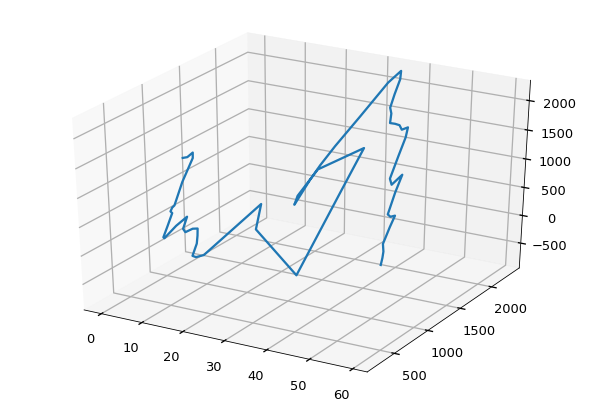

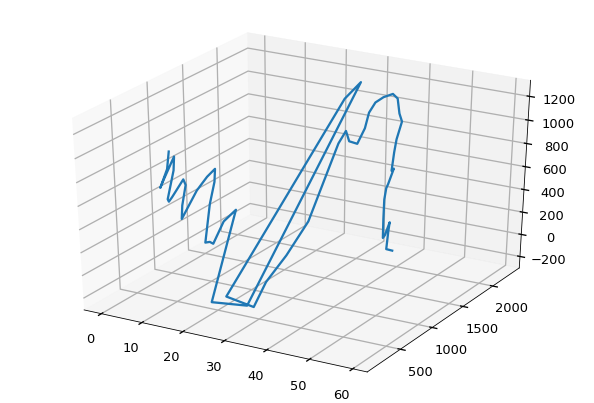

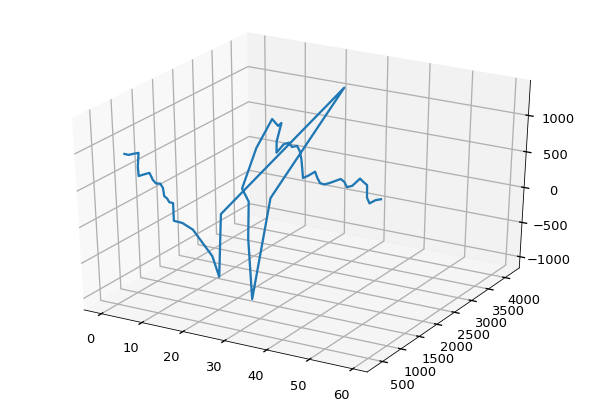

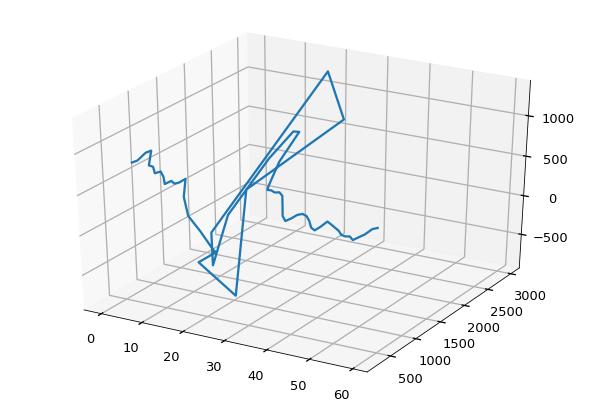

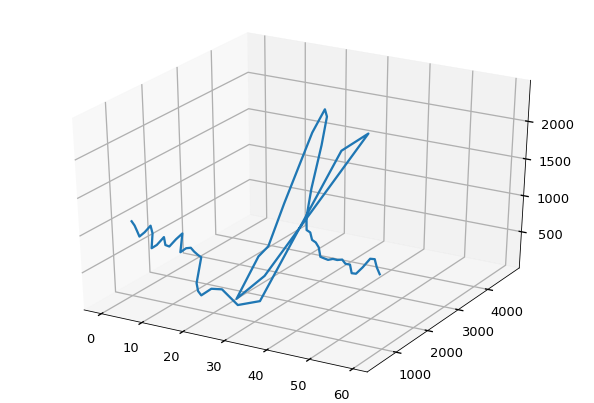

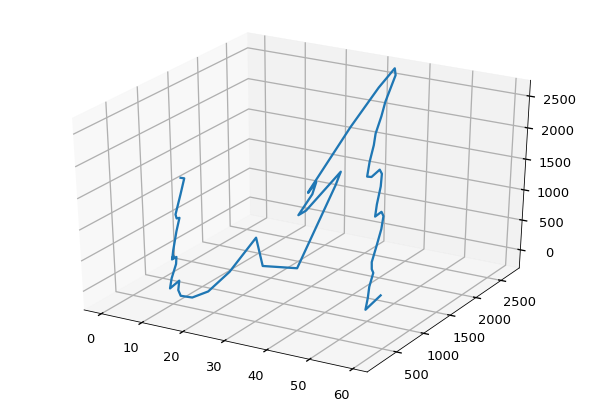

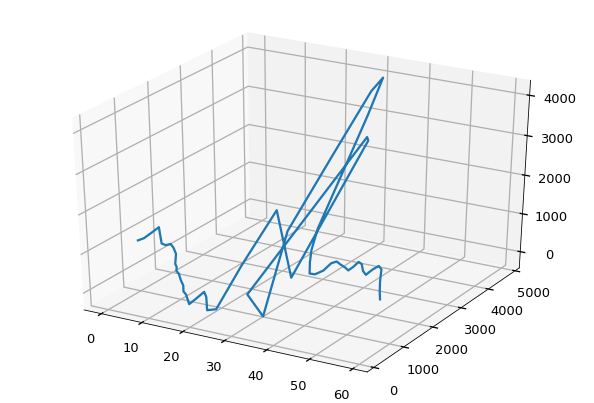

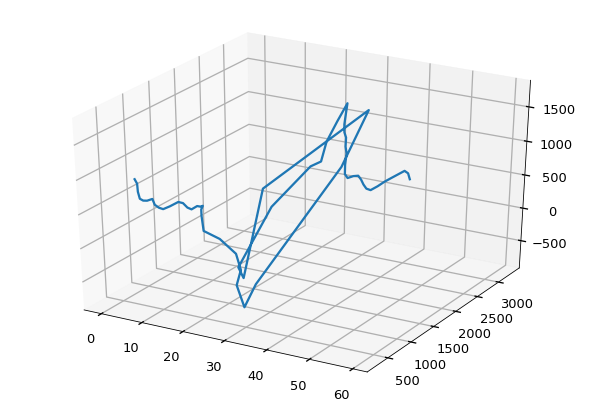

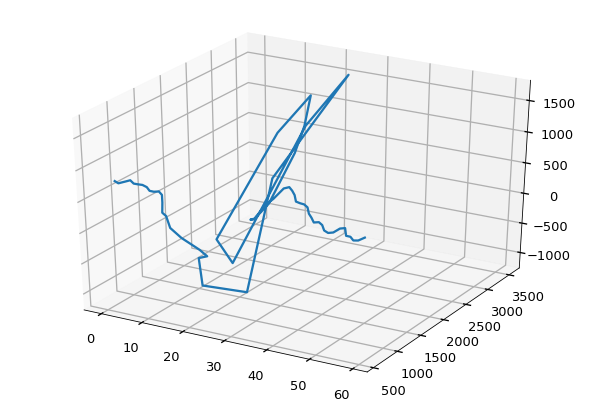

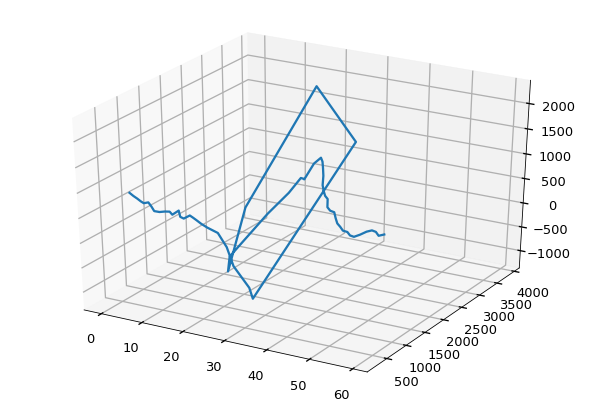

In [111]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
df_li = []
transformer = Normalizer()
'''
for num in range(1):
    df = v.make_DataFrame(num)
    df = transformer.fit(df)
    df_li.append(df)

for tmp_df in df_li:
    X += (tmp_df['GX']/1000)**3
    Y += (tmp_df['GY']/1000)**3
    Z += (tmp_df['GZ']/1000)**3
    '''
for n in range(10000,10010):
    df = v.make_DataFrame(n)
    #df[['AX','AY']] = transformer.fit_transform(df[['AX','AY']])
    plt.style.use('seaborn-talk')
    in_li = [x for x in range(60)]
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    X = np.array(in_li)
    Y = np.array(((df['AX']**2)+(df['AY']**2))**0.5)
    Z = np.array(df['AX'])
    #ax.scatter(X,Y,Z)
    ax.plot(X,Y,Z)
    #plt.plot(X,Y)
    #ax.view_init(10,10)
    plt.show()
